In [2]:
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

In [3]:
review_data = pd.read_csv(r'C:\Users\singe\660project\data\total data\sented_aud.csv')
review_data

,aud,review,date,rate,neg,neu,pos,compound
0,Benjamin S,Major missed opportunity not getting Rick Mora...,1-May-22,3.0,0.019,0.603,0.378,0.9844
1,Clyde N,I really liked it and idk why,1-May-22,3.0,0.165,0.471,0.364,0.4005
2,Wyatt G,This is a fun heist movie that is non-stop hil...,1-May-22,3.0,0.109,0.695,0.196,0.6142
3,Nathan M,not funny or even decent but the action is ser...,27-Apr-22,3.0,0.146,0.854,0.000,-0.1786
4,Jake M,honestly its great. just the final fight felt ...,25-Apr-22,3.0,0.156,0.419,0.425,0.6705
...,...,...,...,...,...,...,...,...
4870,Adis M,"2 points for Scarlett Johansson, the film is u...",7-Jan-21,5.0,0.187,0.633,0.180,-0.0516
4871,Brian P,"An actual good movie, one of the top in the MCU.",2-Jan-21,5.0,0.000,0.657,0.343,0.5719
4872,Kian M,This movie was great love the sound track for ...,31-Dec-20,5.0,0.129,0.420,0.451,0.9260
4873,James H,Captain America: The Winter Soldier surpasses ...,27-Dec-20,5.0,0.000,0.956,0.044,0.1901


In [48]:
data = review_data.drop(['aud','review','date','compound'], axis=1)

In [11]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
normal_data = review_data[['neg','neu','pos','compound']]


In [10]:
corr = normal_data.corr()
corr

,neg,neu,pos,compound
neg,1.000000,-0.269957,-0.423888,-0.675527
neu,-0.269957,1.000000,-0.757654,-0.183086
pos,-0.423888,-0.757654,1.000000,0.630102
compound,-0.675527,-0.183086,0.630102,1.000000


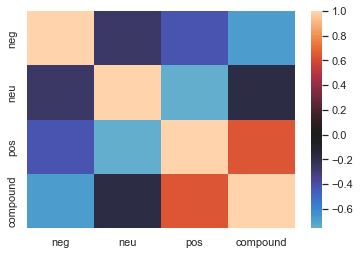

In [12]:
ax = sns.heatmap(corr, center=0)

In [49]:
data.dropna()

,rate,neg,neu,pos
0,3.0,0.019,0.603,0.378
1,3.0,0.165,0.471,0.364
2,3.0,0.109,0.695,0.196
3,3.0,0.146,0.854,0.000
4,3.0,0.156,0.419,0.425
...,...,...,...,...
4870,5.0,0.187,0.633,0.180
4871,5.0,0.000,0.657,0.343
4872,5.0,0.129,0.420,0.451
4873,5.0,0.000,0.956,0.044


In [51]:
import statsmodels.api as sm
data[np.isnan(data)] = 0
data[np.isinf(data)] = 0

In [52]:
y = data['rate']
x = data.drop(['rate'],axis = 1)

In [53]:
X = sm.add_constant(x) 
full_model = sm.OLS(y, x).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          1.128e+04
Date:                Wed, 11 May 2022   Prob (F-statistic):                        0.00
Time:                        16:20:47   Log-Likelihood:                         -8348.2
No. Observations:                4875   AIC:                                  1.670e+04
Df Residuals:                    4872   BIC:                                  1.672e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
neg            2.2218      0.158     14.034      0.000       1.911       2.532
neu            3.5282      0.044     79.987      0.000       3.442       3.615
pos            4.0416      0.091     44.342      0.000       3.863       4.220
==============================================================================
Omnibus:                      479.187   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.491
Skew:                          -0.879   Prob(JB):                    7.47e-138
Kurtosis:                       2.860   Cond. No.                         6.06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""